In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
class PressureVessel():
    
    def __init__(self,t,Di,Pi,eta=1,CA=0,ends_closed=True):
        self.t = t # Thickness of the Pressure Vessel in "mm"
        self.Di = Di # Inner Diameter of the Pressure Vessel in "mm"
        self.Pi = Pi # Internal Pressure in "MPa"
        self.eta = eta # Welded, Riveted or Bolted Efficiency
        self.CA = CA # Corrosion Allowance (if any)
        self.ends_closed = ends_closed # Type of Ends for the pressure vessel (Boolean)
    
    def PV_analysis(self):
        t = self.t
        Di = self.Di
        Do = Di + 2*t
        Pi = self.Pi
        Pd = 1.05*Pi
        eta = self.eta
        CA = self.CA
        ends = self.ends_closed
        
        # Type of Pressure Vessel Check
        
        if(t/Di < 0.1): # Thin Pressure Vessel
            sigma_r = 0 # Radial Stress
            if(eta == 1 and CA == 0):
                print('Calculations as per given Inputs:')
                print()
                print('Radial Stress: {}'.format(sigma_r))
                sigma_t = Pi*Di/(2*t) # Hoop / Circumferential Stress
                print('Hoop / Circumferential Stress: {}'.format(round(sigma_t,2)))
                sigma_l = Pi*Di/(4*t) # Longitudinal Stress
                print('Longitudinal Stress: {}'.format(round(sigma_l,2)))
                print()
            else:
                print('Calculations as per given Inputs: (Design Pressure is considered)')
                print()
                print('Radial Stress: {}'.format(sigma_r))
                sigma_t = (Pd + (Pd*Di/(t-CA)))/(2*eta)
                sigma_t = np.array(map(lambda x: round(x,2),sigma_t))
                print('Hoop / Circumferential Stress: {}'.format(sigma_t))
                sigma_l = Pi*Di/(4*t)
                sigma_l = np.array(map(lambda x: round(x,2),(Pi*Di/(4*t))))
                print('Longitudinal Stress: {}'.format(sigma_l))
                print()
        
        elif(t/Di >= 0.1): # Thick Pressure Vessel
            r = np.arange(Di/2,Di/2 + t + 1,10)
            if(ends == True):
                sigma_r = (-Pi*(Di**2)/(Do**2 - Di**2))*((Do**2/(4*(r**2)))-1)
                print('Radial Stress: {}'.format(list(map(lambda x: round(x,2),sigma_r))))
                print()
                sigma_t = (Pi*(Di**2)/(Do**2 - Di**2))*((Do**2/(4*(r**2)))+1)
                print('Hoop / Circumferential Stress: {}'.format(list(map(lambda x: round(x,2),sigma_t))))
                print()
                sigma_l = round((Pi*(Di**2)/(Do**2 - Di**2)),2)
                print('Longitudinal Stress: {}'.format(list(sigma_l for i in range(len(sigma_r)))))
                print()
                
                # Plotting Variations
                
                # X & Y Axes
                x = np.linspace(-(Do/2)-20,(Do/2)+21,100)
                y = np.linspace(-(Do/2)-20,(Do/2)+21,100)
                z = np.array([0 for i in range(len(x))])
                plt.plot(x,z,'--',color='black',label='x & y Axes',alpha=0.2)
                plt.plot(z,y,'--',color='black',alpha=0.2)
                
                # Inner & Outer Circles
                inner_circle = plt.Circle((0,0),Di/2,color='red',alpha=0.2,label='r = (Di/2)')
                outer_circle = plt.Circle((0,0),Do/2,color='red',alpha=0.1,label='r = (Do/2)')
                plt.gca().add_patch(inner_circle)
                plt.gca().add_patch(outer_circle)
                
                # Radial & Hoop Stresses
                plt.plot(-r,sigma_r,lw=2,color='blue',label='Sigma_r (Radial Stress)')
                plt.plot(r,sigma_t,lw=2,color='orange',label='Sigma_t (Hoop Stress)')
                
                plt.xlim([-(Do/2)-20,(Do/2)+20])
                plt.ylim([-(Do/2)-20,(Do/2)+20])
                plt.gca().set_aspect('equal',adjustable='box')
                plt.legend(bbox_to_anchor=(1.05, 1.0),loc='upper left')
                plt.show()
                
                # Plots of Sigma_r and Sigma_t
                plt.subplot(1,2,1)
                plt.plot(-r,sigma_r,color='blue',label='Radial Stress')
                plt.xlim([-(Do/2)-10,-(Di/2)+10])
                plt.ylim([min(sigma_r)-5,abs(min(sigma_r))])
                plt.xlabel('Radius (r)')
                plt.ylabel('Radial Stress (Sigma_r)')
                plt.legend()
                plt.subplot(1,2,2)
                plt.plot(r,sigma_t,color='orange',label='Hoop Stress')
                plt.xlim([(Di/2)-10,(Do/2)+10])
                plt.ylim([0,max(sigma_t)+5])
                plt.xlabel('Radius (r)')
                plt.ylabel('Hoop Stress (Sigma_t)')
                plt.legend()
                plt.tight_layout()

# EXAMPLES

Case-1 : Di = 400mm ; t = 50 mm ; Pi = 9MPa

Case-2 : Di = 500mm ; t = 20 mm ; Pi = 2.75MPa

<b>Case-1</b>

In [12]:
pv1 = PressureVessel(50,400,9)

In [13]:
pv1.Di

400

In [14]:
pv1.ends_closed

True

In [15]:
pv1.t

50

Radial Stress: [-9.0, -6.68, -4.66, -2.9, -1.36, -0.0]

Hoop / Circumferential Stress: [41.0, 38.68, 36.66, 34.9, 33.36, 32.0]

Longitudinal Stress: [16.0, 16.0, 16.0, 16.0, 16.0, 16.0]



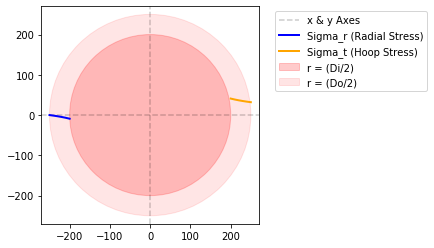

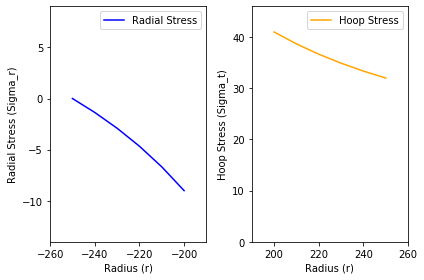

In [16]:
pv1.PV_analysis()

--------------------------

<b>Case-2</b>

In [17]:
pv2 = PressureVessel(20,500,2.75)

In [18]:
pv2.PV_analysis()

Calculations as per given Inputs:

Radial Stress: 0
Hoop / Circumferential Stress: 34.38
Longitudinal Stress: 17.19



---------------------